In [ ]:
# We mounted the picture from our google drive
from matplotlib import pyplot as plt
from google.colab import widgets as wd
from matplotlib import image as img
from google.colab import output
import sys

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import requests
from bs4 import BeautifulSoup
import random

# global variables
total_scores = 0
scene1_check = 0 #use to make sure that when user played 2nd time the total_score will not change
scene2_check = 0
scene3_check = 0
cutscene_1_3_check = 0
cutscene_2_4_check = 0
Item_list = {'B':'Truth Bread', 'D':'Double Down Token'}
Item_bag = []

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Function : Cutscene 1  [Complete]#
def cutscene1_1():
  print("You have traveled back to the past, finding yourself in a city that looks strangely familiar. \n""I know this place,"" you whisper, feeling a sense of having been here before."+\
        "Suddenly, you hear \na scary voice coming from nearby. Fear grips you, making you feel unsafe and afraid.\n")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/Cutscene1_1.jpg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()
  print("\nLooking around desperately, you spot a building that looks like a canteen." +\
        "You start running towards it \nas fast as you can, your heart pounding. But just as you think you're about to reach safety, a monster made of trash appears, blocking your way.")
  print('\n')

def cutscene1_2():
  global Item_bag
  print("You have to win against all of the monsters inorder to reach the building.\n")
  print("Rules:")
  print("     - You will be given a list of trash cans. You have to put the encountered (trash) monsters into the correct trash cans.")
  print("     - If you choose correctly, you will get +5 points. If you choose incorrectly, you will get 0 points.")
  print("     - Please enter your preferred choice by typing a number between 1 and 3.")
  print("     - In each round, there is only one correct answer")
  print("     - In each round, you can use only the item in your Item_bag however only the oldest item can be used\n")
  print("     - In each round, after you defeat all monsters WITHOUT using any items,\n"+\
  "             you will have 33% and 25% chance of getting a 'Truth bread' and 'Double Down Token', respectively\n")
  print("Garbage bins:")
  print("     - 1. General Trash (一般垃圾)")
  print("     - 2. Recycle Trash (資源回收)")
  print("     - 3. Kitchen Waste (廚餘垃圾)")
  print(f"\nItem bag: This bag will keep an item that you have received, you can use one item per round.\n" +\
   "The item will be used one by one in the same order as they are collected")

def cutscene1_4():
  ## Yale EPI web scraper with requests and BeautifulSoup
  recycling_url = "https://epi.yale.edu/epi-results/2022/component/rec"

  # Send a GET request
  response = requests.get(recycling_url)
  #print(response.status_code)
  response.raise_for_status()

  # Parse the HTML content
  soup = BeautifulSoup(response.content, 'html.parser')

  # Find the table under the title 'Recycling'
  table = soup.find('table')
  top_countries = []

  for row in table.find('tbody').find_all('tr'): ##fetch table
      cols = row.find_all('td')
      country = cols[0].text.strip()
      rank = cols[1].text.strip()
      epi_score = cols[2].text.strip()
      top_countries.append({
          'Rank': rank,
          'Country': country,
          'EPI Score': epi_score
      })

  ## FACT 1: Top recycling countries in the world. A ranking by Yale University.
  print("Here is some FUN FACT before fighting the monsters")
  print("Top recycling countries in the world. A ranking by Yale University.\n")
  for country in top_countries[:10]:
      print(f"Rank: {country['Rank']}, Country: {country['Country']}, EPI Score: {country['EPI Score']}")

def cutscene1_3():
  global cutscene_1_3_check
  global Item_bag
  if cutscene_1_3_check == 1:
    print("You have already visited this cutscene so you will not receive any item")
  else:
    global Item_list
    Item_bag.append(Item_list['B'])
  print("Congratulations! you have earned 'The truth bread'\n")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/Cutscene1_4.jpg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()
  print("\nItem's description: This item can be consumed only once. Once you decide to consume this item,\n"+\
          "it will reveal the correct answer in that round however you will receive only half the score\n")
  cutscene_1_3_check = 1
  print(f"Item Bag: {', '.join(str(j) for j in Item_bag)}")

In [ ]:
# Function : Cutscene 2 # [COMPLETE]
def cutscene2_1():
  print("You arrived at the canteen and noticed a lot of trash monsters that are evolved from normal trash. You started thinking that\n" +\
  "this might be one of the reasons why trash is all over the world in the future: people cannot\n" +\
  "dispose of trash in the correct places. You have decided to make things right\n")
  print("It has come into your attention that some of the trash can be distributed into parts and each\n"+\
  "part belongs to different trash can\n")
  print("While you're thinking how to dispose trash in a correct way, there is a random male whispering you from the other side.\n")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/Ping.jpg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()
  print("\nPing: 'Ho Ho Ho, you finally arrived young lady. My name is Ping, the smartest scientist in this century. I shall bring you to the monster nest!\n"+\
  "You friend talks about you a lot. Come hide with me first, I will teach you how to dispose trash in an elegant / correct way.'")

def cutscene2_2():
  print("After a long lecture with TA Ping, you have finally acknowledged the way of disposing trash\n")
  print("For example: A empty paper cup with a plastic lid on top\n"+\
        "             As you can see that we have to peel the plastic lid out first, then we can dispose this paper cup and plastic lid\n"+\
        "             in the Recyclable Paper Containers and General Trash, respectively.\n")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/scene2_backup2.jpg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()

def cutscene2_3():
  print("You have to win against all of the monsters\n")
  print("Rules:")
  print("     - You will be given a list of trash cans. You have to put the encountered (trash) monsters into the correct trash cans.")
  print("     - Please enter your preferred choice by typing a number between 1 and 4.")
  print("     - In each round, there could be more than answer")
  print("     - If you feel that there are two correct answers, please type both of the answers\n")
  print("     - In each round, you can use only the item in your Item_bag however only the oldest item can be used\n")
  print("     - In each round, after you defeat all monsters WITHOUT using any items,\n"+\
  "             you will have 33% and 25% chance of getting a 'Truth bread' and 'Double Down Token', respectively\n")
  print("Garbage bins:")
  print("     - 1. General Trash (一般垃圾)")
  print("     - 2. Recyclable Plastic Bottle (寶特瓶禍首)")
  print("     - 3. Recyclable Paper Containers (紙容器回收)")
  print("     - 4. Kitchen Waste (廚餘垃圾)\n")
  print("Input format: [number], [number] for example: 1, 3\n")
  print("Scoring policy:")
  print("     - For 2 answers: +10 if both are correct, +5 if only one of them is correct, +0 if none is correct")
  print("     - For 1 answers: +5 if ans correctly, +0 for wrong answer")

def cutscene2_4():
  global cutscene_2_4_check
  global Item_bag
  if cutscene_2_4_check == 1:
    print("You have already visited this cutscene so you will not receive any item")
  else:
    global Item_list
    Item_bag.append(Item_list['D'])
  print("Ping: I have already given you all of my knowledge. I will let rest to you, however here is my little gift. Wish you the best of luck young lady.\n")
  print("Congratulations! you have earned 'Double Down Token'\n")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/dd_token.jpg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()
  print("\nItem's description: This item can be consumed only once. Once you decide to consume this item,\n"+\
        "you will get x2 scores if you answer correctly (both multiple answers and single answer), however\n"+\
        "your scores will be deducted x2 if you chose the wrong answer(s)\n")
  cutscene_2_4_check = 1
  print(f"Item Bag: {', '.join(str(j) for j in Item_bag)}")

In [ ]:
# Function : Cutscene 3 #
def cutscene3_1():
  print("After coming out of the cafeteria, you went on a long hike up the Dormy mountain. Finally, you and Ping have arrived at an abandoned building.\n"+\
        "The building is old and rusty and seem to have once been used as a living space for many people in one building...\n")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/Cutscene3_0.jpeg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()

def cutscene3_2():
  print("Ping: This should be it, the nest of the monsters. Let's enter the building and end it for all!\n"+\
        "Ping said as he signaled for you to enter the building first. You entered the building... the inside feels humid and moist with walls covered in moss and mold giving out greeny smells.\n"+\
        "There are sounds of water droplets coming from a leaking pipe nearby, and as we slowly walk up the stairs we can hear growling noises intensifies.\n")
  print("At the top floor, you came upon a room with open doors. The inside is extremely dark")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/Cutscene3_1.jpeg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()
  print("As you lean closer to the open door, you felt a strong force pushing you inside.\n"+\
        "*BAANG!!!*\n"+ "The door suddenly closes and all you hear is silence...")

def cutscene3_3():
  print("'HAHAHAHAHA you've fallen right into my trap!!' you heard a voice boomed behind you.\n"+\
        "Suddenly you see a shadowy figure walking towards you... it is... Ping!!! Our very own scientist!?!?\n"+\
        "But you do not have much time to process the information because suddenly huge trash monsters appear out of nowhere around you. You must fight them first!!!")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/Cutscene3_2.jpeg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()
  ## Add Ping's picture here.

In [ ]:
def endscene_1():
  ## Villain's script
  print("After a long, brutal battle with Ping, you have finally brought him to his knees.\n"+\
      "Ping is now severely wounded, gasping for breath as he collapses to the ground.\n")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/endscene_0.jpeg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()
  return

def endscene_2():
  ## Villain's backstory
  print("With a weak voice, Ping begins to speak, his words filled with bitterness and sorrow.\n" + \
      "\"You... you think you've won, don't you?\" he spits out, blood staining his lips. \"You have no idea...\"\n\n" + \
      "\"I wasn't always like this,\" Ping continues, his eyes glazing over as he recalls his past. \"I was once a respected scientist,\n" + \
      "dedicated to saving this planet. My research on waste management and recycling was celebrated worldwide.\n" + \
      "But then...\" He pauses, pain evident in his voice. \"My wife, Mei, fell ill. It was a rare, mysterious disease caused by toxic waste contamination.\n" + \
      "I tried everything to save her, but it was all in vain. She died, and with her, my reason for hope died too.\"\n\n" + \
      "He takes a shuddering breath, tears mixing with the blood on his face. \"Grief consumed me, twisted into a burning hatred for humanity's carelessness.\n" + \
      "I disappeared, yes, but only to re-emerge with a plan. I created the 'Trash Monster,' a weapon to force humanity to face the consequences of its actions.\"\n\n" + \
      "\"You see, this world doesn't deserve mercy,\" Ping says, his voice growing weaker. \"It deserves to suffer, just as I have suffered.\"\n\n")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/endscene_1.jpg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()
  return
def endscene_3():
  ## Villain's final words
  print("With a pained gasp, Ping collapses to the ground, blood trickling from the corner of his mouth.\n" + \
      "\"You... you think this changes anything?\" he wheezes, glaring up at you with defiant eyes.\n" + \
      "\"Humanity will still pay for its sins, one way or another...\" Then Ping finally crumbled.\n")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/endscene_2.jpeg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()
  return
def endscene_4():
  ## Travel back to the future.
  print("As the light inside the portal fade away, rays from the sun hit your eyes.\n"+\
        "You were then teleported on to the top of a building overlooking a green city.\n"+\
        "Relief suddenly flood through you as you realize that you've successfully saved the world from its doom.\n"+\
        "You smiled happily as you continue to watch the sunset on top of the building.\n")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/endscene_3.jpeg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()
  print("\n~The End~")

def loseScene():
  print("Unfortunately your final score is below 80")
  print("Ping: HA! I thought so, you're just as weak as I thought! You're too pathetic to save this world!")
  print("You slowly succumb to your wounds drifting away slowly. As your eyes close for one last time, all you can hear is the evil laughter of Ping.\n")
  image = img.imread(f'/content/drive/MyDrive/Start_Scene/Cutscene3_2.jpeg')
  imgplot = plt.imshow(image)
  plt.axis('off')
  plt.show()

In [ ]:
class Question: # Class for question
  def __init__(self, name, ans, score, scene_ID, ansKey):
    self.name = name
    self.ans = ans
    self.score = score
    self.scene_ID = scene_ID
    self.ansKey = ansKey

In [ ]:
# Function : fighting in scene 1 [COMPLETE]
# picture source: AI #
      # TODO
            # Handle Invalid input [SOLVED]
            # prevent played for the 2nd time and still get items ans score [SOLVED]
            # Add new feature aka Item using [DONE]
            # Announcement about user has played b4 so no scores in this round [DONE]
#############################################################################################################################################
def scene1():
  global Item_bag
  global Item_list
  bins = {1 : 'General Trash (一般垃圾)', 2 : 'Recycle Trash (資源回收)', 3 : 'Kitchen Waste (廚餘垃圾)'}
  question_set = [Question('Plastic Bottle Monster', bins[2], 5.0, 1, [2]),\
    Question('Vegetable Monster', bins[3], 5.0, 1, [3]),\
    Question('Ceramic Monster', bins[1], 5.0, 1, [1]),\
    Question('Lay\'s Monster', bins[1], 5.0, 1, [1]),\
    Question('Milk Carton Monster', bins[2], 5.0, 1, [2])] # answer key... --> save it somewhere ppl cannot see????
  fight_tb = wd.TabBar(['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Conclusion'])

  i = 0
  scores = 0.0
  user_ans1 = []
  user_itemused1 = []
  while i <= 5:
    try:
      with fight_tb.output_to(i):
        if i != 5:
          print(f'\nYou encountered a {question_set[i].name}!\n')
          image = img.imread(f'/content/drive/MyDrive/Start_Scene/scene1_{i}.jpeg')
          imgplot = plt.imshow(image)
          plt.axis('off')
          plt.show()
          print(f"\nItem Bag: {', '.join(str(j) for j in Item_bag)}") if len(Item_bag) > 0 else print("Item Bag: 'Empty'")
          print(f'\n1. {bins[1]}')
          print(f'2. {bins[2]}')
          print(f'3. {bins[3]}')
          if len(Item_bag) > 0:
            print(f'4. Use {Item_bag[0]}')
          num = 0
          while True:
            try:
              if len(Item_bag) > 0:
                num = int(input())
                assert num >= 1 and num <= 4
                break
              else:
                num = int(input())
                assert num >= 1 and num < 4
                break
            except EOFError:
              break
            except:
              continue
          item_tag = 0
          if num == 4:
            x = Item_bag.pop(0)
            print(f"\nYou have used the item: {x}")
            if x == 'Double Down Token': #item tag = 1
              item_tag = 1
            elif x == 'Truth Bread': #item tag = 0
              print(f'The correct answer: {question_set[i].ans}')
              item_tag = 2
            while True:
              try:
                  num = int(input())
                  assert num >= 1 and num < 4
                  break
              except EOFError:
                break
              except:
                continue
          user_ans1.append(bins[num])
          user_itemused1.append(item_tag)
        else:
          global scene1_check
          global total_scores
          if scene1_check == 1:
            print("You have played this stage before so the scores you have earned will be 0")
          idx = 0
          while idx < 5:
            dd_rate = random.randint(1, 4)
            tb_rate = random.randint(1, 3)
            print(f'Round {idx+1} : {question_set[idx].name}')
            print('-------------------------------------------')
            print(f'You have answered : {user_ans1[idx]}')
            print(f'Correct answer    : {question_set[idx].ans}')
            if user_ans1[idx] == question_set[idx].ans and user_itemused1[idx] == 1: #used double down token
              scores += 10.0
              print('+10.0 points')
            elif user_ans1[idx] != question_set[idx].ans and user_itemused1[idx] == 1: #used double down token but ans wrong :(
              scores -= 10.0
              print('-10.0 points')
            elif user_ans1[idx] == question_set[idx].ans and user_itemused1[idx] == 2: #used the truth bread
              scores += 2.5
              print('+2.5 points')
            elif user_ans1[idx] == question_set[idx].ans and user_itemused1[idx] == 0:
              scores += 5.0
              print('+5.0 points')
              ### Items randomly dropping section
              if scene1_check == 0:
                if dd_rate == 4:
                  print(f"You have received new item: Double Down Token")
                  Item_bag.append(Item_list['D'])
                if tb_rate == 3:
                  print(f"You have received new item: Truth Bread")
                  Item_bag.append(Item_list['B'])
            else:
              print('+0.0 points')
            print('\n')
            idx += 1
          if scene1_check == 1:
            scores = 0.0
          total_scores += scores
          print(f'Your total score is {scores}')
          print(f'Your accumulated score is {total_scores}')
          print(f"\nItem Bag: {', '.join(str(j) for j in Item_bag)}") if len(Item_bag) > 0 else print("Item Bag: 'Empty'")
          scene1_check = 1
          break
        i += 1
    except Exception as e: #if error bypassed handler inside, quit game
      break

In [ ]:
# Function : fighting in scene 2
# picture source: Taking in Shuimu #
      # TODO
            # Handle Invalid input
            # prevent played for the 2nd time and still get items ans score [SOLVED]
            # Add new feature aka Item using [DONE]
            # Announcement about user has played b4 so no scores in this round [DONE]
#############################################################################################################################################
def scene2():
  bins = {1 : 'General Trash (一般垃圾)', 2 : 'Recyclable Plastic Bottle (寶特瓶禍首)', 3 : 'Recyclable Paper Containers (紙容器回收)', 4 : 'Kitchen Waste (廚餘垃圾)'}
  question_set2 = [Question('Food Box Monster (Empty)', [bins[3]], 5.0, 2, [3]),\
    Question('Food Bowl Monster', [bins[3], bins[4]], 5.0, 2, [3,4]),\
    Question('Coffee Cup Monster (Empty)', [bins[1], bins[3]], 5.0, 2, [1,3]),\
    Question('Plastic Cup Monster (Empty)', [bins[1]], 5.0, 2, [1]),\
    Question('Snack Package Monster (Empty)', [bins[1], bins[3]], 5.0, 2, [1,3])]
  fight_tb = wd.TabBar(['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Conclusion'])

  i = 0
  scores = 0.0
  user_ans2 = []
  user_itemused2 = []
  while i <= 5:
    try:
      with fight_tb.output_to(i):
        if i != 5:
          print(f'\nYou encountered a {question_set2[i].name}!\n')
          image = img.imread(f'/content/drive/MyDrive/Start_Scene/scene2_{i}.jpg')
          imgplot = plt.imshow(image)
          plt.axis('off')
          plt.show()
          print(f"\nItem Bag: {', '.join(str(j) for j in Item_bag)}") if len(Item_bag) > 0 else print("Item Bag: 'Empty'")
          print(f'\n1. {bins[1]}')
          print(f'2. {bins[2]}')
          print(f'3. {bins[3]}')
          print(f'4. {bins[4]}')
          if len(Item_bag) > 0:
            print(f'5. Use {Item_bag[0]}')
          num = 0
          while True:
            try:
              num = list(int(item) for item in input().split(', '))
              if len(Item_bag) > 0:
                for element in num: #check validity of input
                  assert int(element) >= 1 and int(element) <= 5
                break
              else:
                for element in num: #check validity of input
                  assert int(element) >= 1 and int(element) < 5
                break
            except EOFError:
              break
            except:
              continue
          item_tag = 0
          if num[0] == 5:
            x = Item_bag.pop(0)
            print(f"\nYou have used the item: {x}")
            if x == 'Double Down Token': #item tag = 1
              item_tag = 1
            elif x == 'Truth Bread': #item tag = 0
              print(f"The correct answer(s): {' / '.join(str(j) for j in question_set2[i].ans)}")
              item_tag = 2
            while True:
              try:
                num = list(int(item) for item in input().split(', '))
                for element in num: #check validity of input
                  assert int(element) >= 1 and int(element) < 5
                break
              except EOFError:
                break
              except:
                continue
          #if set(num) == set(question_set2[i].ansKey):
            #print('correct')
            #scores += question_set2[i].score
          sort_num = set(num)
          tmp_list = []
          for item in sort_num:
            tmp_list.append(bins[item])
          user_ans2.append(tmp_list)
          user_itemused2.append(item_tag)
        else:
          global scene2_check
          if scene2_check == 1:
            print("You have played this stage before so the scores you have earned will be 0")
          idx = 0
          while idx < 5: # Need some fixes
            dd_rate = random.randint(1, 4)
            tb_rate = random.randint(1, 3)
            print(f'Round {idx+1} : {question_set2[idx].name}')
            print('-------------------------------------------')
            print(f"You have answered : {' / '.join(str(j) for j in user_ans2[idx])}")
            print(f"Correct answer    : {' / '.join(str(k) for k in question_set2[idx].ans)}")
            if user_ans2[idx] == question_set2[idx].ans and user_itemused2[idx] == 0:
              print('+10.0 points')
              scores += 10.0
              ### Items randomly dropping section
              if scene1_check == 0:
                if dd_rate == 4:
                  print(f"You have received new item: Double Down Token")
                  Item_bag.append(Item_list['D'])
                if tb_rate == 3:
                  print(f"You have received new item: Truth Bread")
                  Item_bag.append(Item_list['B'])
            elif user_ans2[idx] == question_set2[idx].ans and user_itemused2[idx] == 1:
              print('+20.0 points')
              scores += 20.0
            elif user_ans2[idx] == question_set2[idx].ans and user_itemused2[idx] == 2:
              print('+5.0 points')
              scores += 5.0
            else:
              pscores = 0.0
              for j in user_ans2[idx]:
                if j in question_set2[idx].ans:
                  if user_itemused2[idx] == 1:
                    pscores += 10.0
                    scores += 10.0
                  elif user_itemused2[idx] == 2:
                    pscores += 2.5
                    scores += 2.5
                  else:
                    pass
                else:
                  pass
              if pscores == 0 and user_itemused2[idx] == 1:
                pscores = -20.0
                scores -= 20.0
                print(f"-{pscores} points")
              else:
                print(f"+{pscores} points")
            print('\n')
            idx += 1

          global total_scores
          #if player played b4
          if scene2_check == 1:
            scores = 0.0
          total_scores += scores
          print(f'Your total score is {scores}')
          print(f'Your accumulated score is {total_scores}')
          scene2_check = 1
          break
        i += 1
    except Exception as e: #if error bypassed handler inside, quit game
      break

In [ ]:
# Function : fighting in scene 3
def scene3():
  bins = {1 : 'General Trash (一般垃圾)', 2 : 'Recyclable Plastic Bottle (寶特瓶禍首)', 3 : 'Glass bottles(玻璃瓶)', 4 : 'Recyclable Paper Containers (紙容器回收)', 5 : 'Kitchen Waste (廚餘垃圾)'}
  question_set3 = [Question('Shampoo Bottle Monster (Empty, Paper Label)', [bins[1], bins[2]], 5.0, 2, [1,2]),\
    Question('Old Battery Monster', [bins[1]], 5.0, 2, [1]),\
    Question('Expired liquid Medicine Monster', [bins[1]], 5.0, 2, [1,3])]
  fight_tb = wd.TabBar(['Round 1', 'Round 2', 'Round 3', 'Conclusion'])

  i = 0
  scores = 0.0
  user_ans3 = []
  user_itemused3 = []
  while i <= 3:
    try:
      with fight_tb.output_to(i):
        if i != 3:
          print(f'\nYou encountered a {question_set3[i].name}!\n')
          image = img.imread(f'/content/drive/MyDrive/Start_Scene/scene3_{i}.jpg')
          imgplot = plt.imshow(image)
          plt.axis('off')
          plt.show()
          print(f"\nItem Bag: {', '.join(str(j) for j in Item_bag)}") if len(Item_bag) > 0 else print("Item Bag: 'Empty'")
          print(f'\n1. {bins[1]}')
          print(f'2. {bins[2]}')
          print(f'3. {bins[3]}')
          print(f'4. {bins[4]}')
          print(f'5. {bins[5]}')
          if len(Item_bag) > 0:
            print(f'6. Use {Item_bag[0]}')
          num = 0
          while True:
            try:
              num = list(int(item) for item in input().split(', '))
              if len(Item_bag) > 0:
                for element in num: #check validity of input
                  assert int(element) >= 1 and int(element) <= 6
                break
              else:
                for element in num: #check validity of input
                  assert int(element) >= 1 and int(element) < 6
                break
            except EOFError:
              break
            except:
              continue
          item_tag = 0
          if num[0] == 6:
            x = Item_bag.pop(0)
            print(f"\nYou have used the item: {x}")
            if x == 'Double Down Token': #item tag = 1
              item_tag = 1
            elif x == 'Truth Bread': #item tag = 0
              print(f"The correct answer(s): {' / '.join(str(j) for j in question_set3[i].ans)}")
              item_tag = 2
            while True:
              try:
                num = list(int(item) for item in input().split(', '))
                for element in num: #check validity of input
                  assert int(element) >= 1 and int(element) < 5
                break
              except EOFError:
                break
              except:
                continue
          sort_num = set(num)
          tmp_list = []
          for item in sort_num:
            tmp_list.append(bins[item])
          user_ans3.append(tmp_list)
          user_itemused3.append(item_tag)
        else:
          global scene3_check
          if scene3_check == 1:
            print("You have played this stage before so the scores you have earned will be 0")
          idx = 0
          while idx < 3: # Need some fixes
            dd_rate = random.randint(1, 4)
            tb_rate = random.randint(1, 3)
            print(f'Round {idx+1} : {question_set3[idx].name}')
            print('-------------------------------------------')
            print(f"You have answered : {' / '.join(str(j) for j in user_ans3[idx])}")
            print(f"Correct answer    : {' / '.join(str(k) for k in question_set3[idx].ans)}")
            if user_ans3[idx] == question_set3[idx].ans and user_itemused3[idx] == 0:
              print('+10.0 points')
              scores += 10.0
            elif user_ans3[idx] == question_set3[idx].ans and user_itemused3[idx] == 1:
              print('+20.0 points')
              scores += 20.0
            elif user_ans3[idx] == question_set3[idx].ans and user_itemused3[idx] == 2:
              print('+2.0 points')
              scores += 2.0
            else:
              pscores = 0.0
              for j in user_ans3[idx]:
                if j in question_set3[idx].ans:
                  if user_itemused3[idx] == 1:
                    pscores += 10.0
                    scores += 10.0
                  elif user_itemused3[idx] == 2:
                    pscores += 1
                    scores += 1
                  else:
                    pass
                else:
                  pass
              if pscores == 0 and user_itemused3[idx] == 1:
                pscores = -20.0
                scores -= 20.0
                print(f"-{pscores} points")
              else:
                print(f"+{pscores} points")
            print('\n')
            idx += 1

          global total_scores
          #if player played b4
          if scene3_check == 1:
            scores = 0.0
          total_scores += scores
          print(f'Your total score is {scores}')
          print(f'Your accumulated score is {total_scores}')
          print('\nTip 1: If your shampoo bottle is not empty, it is recommended to drain the bottle before throwing away the bottle in their designated bins. Don\'t forget to peel the label off and discard them in their respective bins too!')
          scene3_check = 1
          break
        i += 1
    except Exception as e: #if error bypassed handler inside, quit game
      break

In [ ]:
# Function : Start scene [COMPLETE]

# TEST: Displaying the story (may need to draw something here)
# Updated: Works pretty well by using AI Ideogram that Prof Chen taught

## Small Bug [SOLVED] ##
# We have to wait to until the program generates all the scenes first then we can manually start at scene 1 (by clicking "Scene 1")
## Solution: tb.output_to(i, select = False) --> will not automatically translate to another tab.
def intro():
  img_asset = ['/content/drive/MyDrive/Start_Scene/StartScene_0.jpg', '/content/drive/MyDrive/Start_Scene/girl-in-portal.jpeg', '/content/drive/MyDrive/Start_Scene/girl-out-portal.jpeg']
  tb = wd.TabBar(['Scene 1', 'Scene 2', 'Scene 3'])
  for i in range(3):
    with tb.output_to(i, select = False):
      if i == 0:
        print("\nNarrator: In 2025, the world is collapsing from the trash everywhere. However, your friend, a GENIUS, has invented a time machine.\n"+\
              "He asked you to travel back to the past using his handmade time machine to the trash monster's nest and destroy it with your knowledge.\n"+\
              '"You are our last hope...we are in the endgame now," said your friend. You have no choice but to travel back to the past and make things right!!\n')
      elif i == 2:
        print('\nThe total socres are 105\n'+\
        "You have to earn the score more than 80 points in order to save our world.\n\n")
        print("Wish you the best of luck!")
      image = img.imread(img_asset[i]) #load image from directory list.
      imgplot = plt.imshow(image)
      plt.axis('off')
      plt.show()
      print("\nPlease click 'scene2' and 'scene3' to continue the story.")

In [ ]:
#------------------------------------------------------ The story begins here -----------------------------------------------------------#

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Narrator: In 2025, the world is collapsing from the trash everywhere. However, your friend, a GENIUS, has invented a time machine.
He asked you to travel back to the past using his handmade time machine to the trash monster's nest and destroy it with your knowledge.
"You are our last hope...we are in the endgame now," said your friend. You have no choice but to travel back to the past and make things right!!



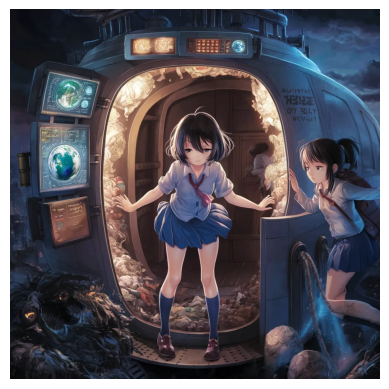


Please click 'scene2' and 'scene3' to continue the story.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

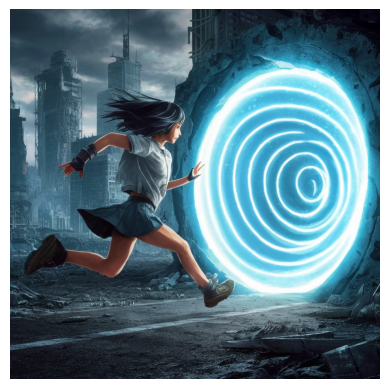


Please click 'scene2' and 'scene3' to continue the story.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


The total socres are 105
You have to earn the score more than 80 points in order to save our world.


Wish you the best of luck!


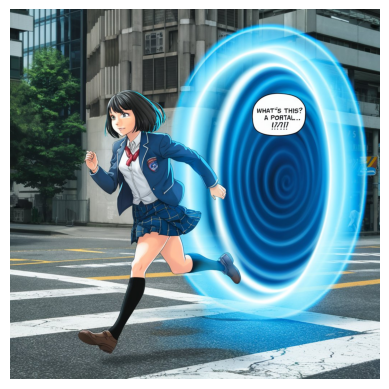


Please click 'scene2' and 'scene3' to continue the story.


<IPython.core.display.Javascript object>

In [ ]:
#Start scene
intro()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You have traveled back to the past, finding yourself in a city that looks strangely familiar. 
I know this place, you whisper, feeling a sense of having been here before.Suddenly, you hear 
a scary voice coming from nearby. Fear grips you, making you feel unsafe and afraid.



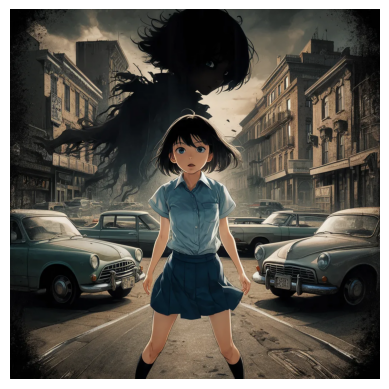


Looking around desperately, you spot a building that looks like a canteen.You start running towards it 
as fast as you can, your heart pounding. But just as you think you're about to reach safety, a monster made of trash appears, blocking your way.




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You have to win against all of the monsters inorder to reach the building.

Rules:
     - You will be given a list of trash cans. You have to put the encountered (trash) monsters into the correct trash cans.
     - If you choose correctly, you will get +5 points. If you choose incorrectly, you will get 0 points.
     - Please enter your preferred choice by typing a number between 1 and 3.
     - In each round, there is only one correct answer
     - In each round, you can use only the item in your Item_bag however only the oldest item can be used

     - In each round, after you defeat all monsters WITHOUT using any items,
             you will have 33% and 25% chance of getting a 'Truth bread' and 'Double Down Token', respectively

Garbage bins:
     - 1. General Trash (一般垃圾)
     - 2. Recycle Trash (資源回收)
     - 3. Kitchen Waste (廚餘垃圾)

Item bag: This bag will keep an item that you have received, you can use one item per round.
The item will be used one by one in the same order as th

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Congratulations! you have earned 'The truth bread'



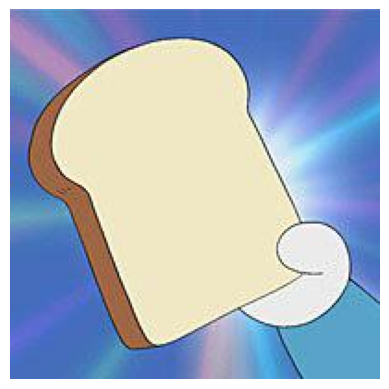


Item's description: This item can be consumed only once. Once you decide to consume this item,
it will reveal the correct answer in that round however you will receive only half the score

Item Bag: Truth Bread


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Here is some FUN FACT before fighting the monsters
Top recycling countries in the world. A ranking by Yale University.

Rank: 1, Country: South Korea, EPI Score: 67.10
Rank: 2, Country: Samoa, EPI Score: 57.60
Rank: 3, Country: Benin, EPI Score: 56.90
Rank: 4, Country: Iceland, EPI Score: 55.50
Rank: 5, Country: Australia, EPI Score: 52.90
Rank: 5, Country: Vanuatu, EPI Score: 52.90
Rank: 7, Country: Singapore, EPI Score: 51.70
Rank: 8, Country: Philippines, EPI Score: 49.90
Rank: 9, Country: Germany, EPI Score: 49.80
Rank: 10, Country: Viet Nam, EPI Score: 46.00


<IPython.core.display.Javascript object>

In [ ]:
# Cutscene 1#
cutscene1_tb = wd.TabBar(['Cutscene 1.1', 'Cutscene 1.2', 'Cutscene 1.3', 'Cutscene 1.4'])
for i in range(4):
  with cutscene1_tb.output_to(i, select = False):
    if i == 0:
      cutscene1_1()
    elif i == 1:
      cutscene1_2()
    elif i == 2:
      cutscene1_3()
    else:
      cutscene1_4()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Plastic Bottle Monster!



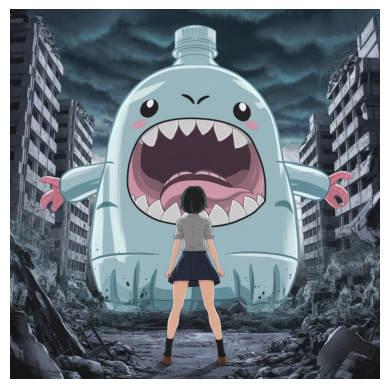


Item Bag: Truth Bread

1. General Trash (一般垃圾)
2. Recycle Trash (資源回收)
3. Kitchen Waste (廚餘垃圾)
4. Use Truth Bread
2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Vegetable Monster!



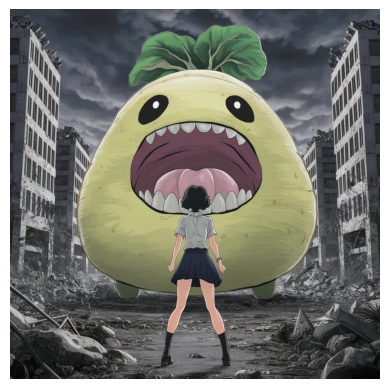


Item Bag: Truth Bread

1. General Trash (一般垃圾)
2. Recycle Trash (資源回收)
3. Kitchen Waste (廚餘垃圾)
4. Use Truth Bread
1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Ceramic Monster!



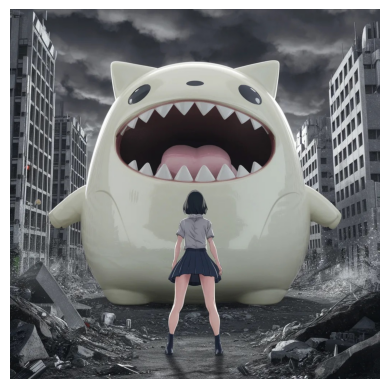


Item Bag: Truth Bread

1. General Trash (一般垃圾)
2. Recycle Trash (資源回收)
3. Kitchen Waste (廚餘垃圾)
4. Use Truth Bread
4

You have used the item: Truth Bread
The correct answer: General Trash (一般垃圾)
1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Lay's Monster!



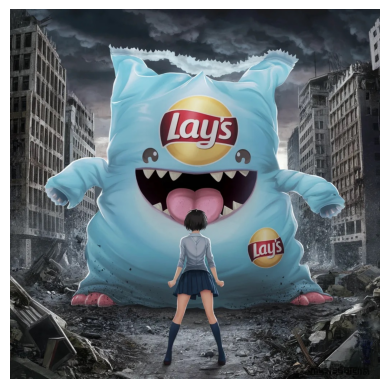

Item Bag: 'Empty'

1. General Trash (一般垃圾)
2. Recycle Trash (資源回收)
3. Kitchen Waste (廚餘垃圾)
1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Milk Carton Monster!



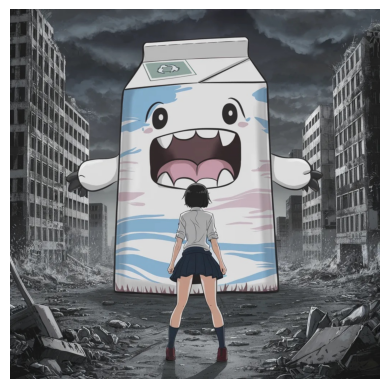

Item Bag: 'Empty'

1. General Trash (一般垃圾)
2. Recycle Trash (資源回收)
3. Kitchen Waste (廚餘垃圾)
2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Round 1 : Plastic Bottle Monster
-------------------------------------------
You have answered : Recycle Trash (資源回收)
Correct answer    : Recycle Trash (資源回收)
+5.0 points


Round 2 : Vegetable Monster
-------------------------------------------
You have answered : General Trash (一般垃圾)
Correct answer    : Kitchen Waste (廚餘垃圾)
+0.0 points


Round 3 : Ceramic Monster
-------------------------------------------
You have answered : General Trash (一般垃圾)
Correct answer    : General Trash (一般垃圾)
+2.5 points


Round 4 : Lay's Monster
-------------------------------------------
You have answered : General Trash (一般垃圾)
Correct answer    : General Trash (一般垃圾)
+5.0 points


Round 5 : Milk Carton Monster
-------------------------------------------
You have answered : Recycle Trash (資源回收)
Correct answer    : Recycle Trash (資源回收)
+5.0 points


Your total score is 17.5
Your accumulated score is 17.5
Item Bag: 'Empty'


<IPython.core.display.Javascript object>

In [ ]:
# --- Fight Scene 1 --- #
# --- stage: in city --- #
# update item bag feature
scene1()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You arrived at the canteen and noticed a lot of trash monsters that are evolved from normal trash. You started thinking that
this might be one of the reasons why trash is all over the world in the future: people cannot
dispose of trash in the correct places. You have decided to make things right

It has come into your attention that some of the trash can be distributed into parts and each
part belongs to different trash can

While you're thinking how to dispose trash in a correct way, there is a random male whispering you from the other side.



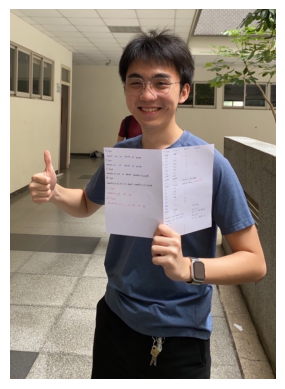


Ping: 'Ho Ho Ho, you finally arrived young lady. My name is Ping, the smartest scientist in this century. I shall bring you to the monster nest!
You friend talks about you a lot. Come hide with me first, I will teach you how to dispose trash in an elegant / correct way.'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After a long lecture with TA Ping, you have finally acknowledged the way of disposing trash

For example: A empty paper cup with a plastic lid on top
             As you can see that we have to peel the plastic lid out first, then we can dispose this paper cup and plastic lid
             in the Recyclable Paper Containers and General Trash, respectively.



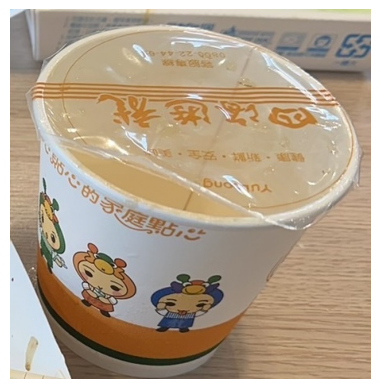

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You have to win against all of the monsters

Rules:
     - You will be given a list of trash cans. You have to put the encountered (trash) monsters into the correct trash cans.
     - Please enter your preferred choice by typing a number between 1 and 4.
     - In each round, there could be more than answer
     - If you feel that there are two correct answers, please type both of the answers

     - In each round, you can use only the item in your Item_bag however only the oldest item can be used

     - In each round, after you defeat all monsters WITHOUT using any items,
             you will have 33% and 25% chance of getting a 'Truth bread' and 'Double Down Token', respectively

Garbage bins:
     - 1. General Trash (一般垃圾)
     - 2. Recyclable Plastic Bottle (寶特瓶禍首)
     - 3. Recyclable Paper Containers (紙容器回收)
     - 4. Kitchen Waste (廚餘垃圾)

Input format: [number], [number] for example: 1, 3

Scoring policy:
     - For 2 answers: +10 if both are correct, +5 if only one of them is

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ping: I have already given you all of my knowledge. I will let rest to you, however here is my little gift. Wish you the best of luck young lady.

Congratulations! you have earned 'Double Down Token'



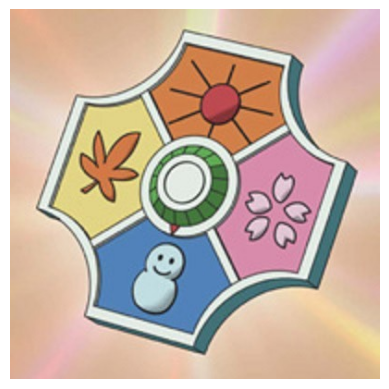


Item's description: This item can be consumed only once. Once you decide to consume this item,
you will get x2 scores if you answer correctly (both multiple answers and single answer), however
your scores will be deducted x2 if you chose the wrong answer(s)

Item Bag: Double Down Token


<IPython.core.display.Javascript object>

In [ ]:
# --- Cutscene 2 --- #
cutscene2_tb = wd.TabBar(['Cutscene 2.1', 'Cutscene 2.2', 'Cutscene 2.3', 'Cutscene 2.4'])
for i in range(4):
  with cutscene2_tb.output_to(i, select = False):
    if i == 0:
      cutscene2_1()
    elif i == 1:
      cutscene2_2()
    elif i == 2:
      cutscene2_3()
    else:
      cutscene2_4()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Food Box Monster (Empty)!



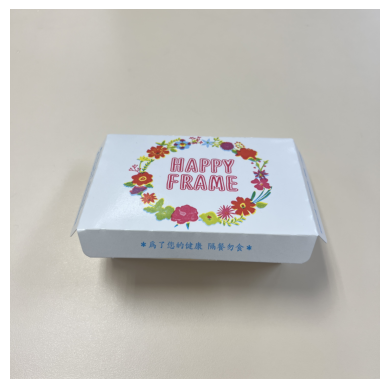


Item Bag: Double Down Token

1. General Trash (一般垃圾)
2. Recyclable Plastic Bottle (寶特瓶禍首)
3. Recyclable Paper Containers (紙容器回收)
4. Kitchen Waste (廚餘垃圾)
5. Use Double Down Token
3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Food Bowl Monster!



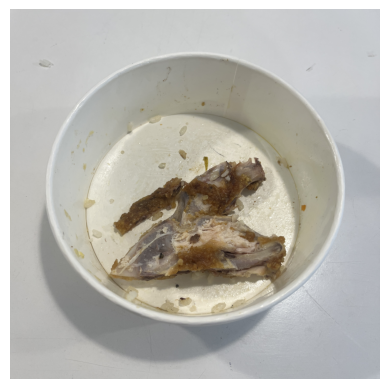


Item Bag: Double Down Token

1. General Trash (一般垃圾)
2. Recyclable Plastic Bottle (寶特瓶禍首)
3. Recyclable Paper Containers (紙容器回收)
4. Kitchen Waste (廚餘垃圾)
5. Use Double Down Token
5

You have used the item: Double Down Token
3, 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Coffee Cup Monster (Empty)!



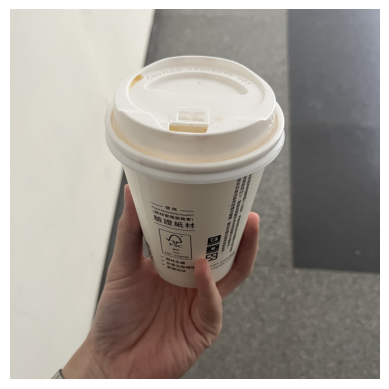

Item Bag: 'Empty'

1. General Trash (一般垃圾)
2. Recyclable Plastic Bottle (寶特瓶禍首)
3. Recyclable Paper Containers (紙容器回收)
4. Kitchen Waste (廚餘垃圾)
1, 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Plastic Cup Monster (Empty)!



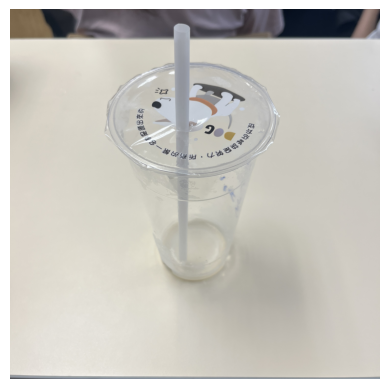

Item Bag: 'Empty'

1. General Trash (一般垃圾)
2. Recyclable Plastic Bottle (寶特瓶禍首)
3. Recyclable Paper Containers (紙容器回收)
4. Kitchen Waste (廚餘垃圾)
2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Snack Package Monster (Empty)!



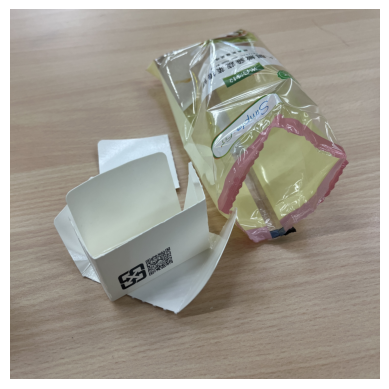

Item Bag: 'Empty'

1. General Trash (一般垃圾)
2. Recyclable Plastic Bottle (寶特瓶禍首)
3. Recyclable Paper Containers (紙容器回收)
4. Kitchen Waste (廚餘垃圾)
3, 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Round 1 : Food Box Monster (Empty)
-------------------------------------------
You have answered : Recyclable Paper Containers (紙容器回收)
Correct answer    : Recyclable Paper Containers (紙容器回收)
+10.0 points


Round 2 : Food Bowl Monster
-------------------------------------------
You have answered : General Trash (一般垃圾) / Recyclable Paper Containers (紙容器回收)
Correct answer    : Recyclable Paper Containers (紙容器回收) / Kitchen Waste (廚餘垃圾)
+10.0 points


Round 3 : Coffee Cup Monster (Empty)
-------------------------------------------
You have answered : General Trash (一般垃圾) / Recyclable Paper Containers (紙容器回收)
Correct answer    : General Trash (一般垃圾) / Recyclable Paper Containers (紙容器回收)
+10.0 points


Round 4 : Plastic Cup Monster (Empty)
-------------------------------------------
You have answered : Recyclable Plastic Bottle (寶特瓶禍首)
Correct answer    : General Trash (一般垃圾)
+0.0 points


Round 5 : Snack Package Monster (Empty)
-------------------------------------------
You have answered : 

<IPython.core.display.Javascript object>

In [ ]:
# --- Fight Scene 2 --- #
# --- stage: Shuimu --- #
# Use the real photo because it's more realistic about distribute the trash each to parts
# update item bag feature
#Item_bag.append(Item_list['D'])
scene2()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After coming out of the cafeteria, you went on a long hike up the Dormy mountain. Finally, you and Ping have arrived at an abandoned building.
The building is old and rusty and seem to have once been used as a living space for many people in one building...



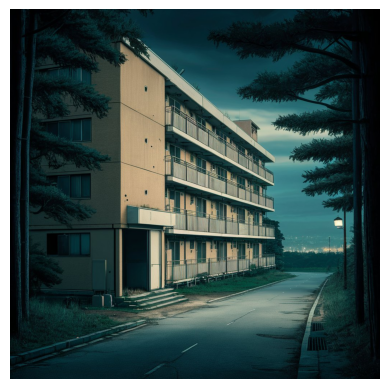

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ping: This should be it, the nest of the monsters. Let's enter the building and end it for all!
Ping said as he signaled for you to enter the building first. You entered the building... the inside feels humid and moist with walls covered in moss and mold giving out greeny smells.
There are sounds of water droplets coming from a leaking pipe nearby, and as we slowly walk up the stairs we can hear growling noises intensifies.

At the top floor, you came upon a room with open doors. The inside is extremely dark


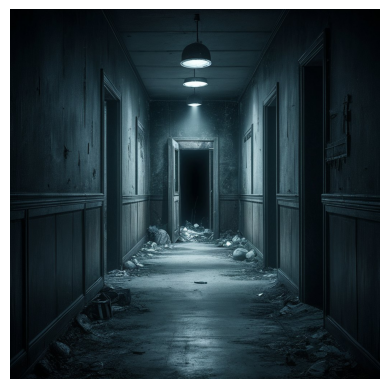

As you lean closer to the open door, you felt a strong force pushing you inside.
*BAANG!!!*
The door suddenly closes and all you hear is silence...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'HAHAHAHAHA you've fallen right into my trap!!' you heard a voice boomed behind you.
Suddenly you see a shadowy figure walking towards you... it is... Ping!!! Our very own scientist!?!?
But you do not have much time to process the information because suddenly huge trash monsters appear out of nowhere around you. You must fight them first!!!


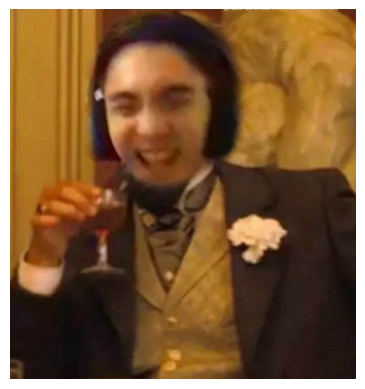

<IPython.core.display.Javascript object>

In [ ]:
# --- cut scene 3 --- #
cutscene3_tb = wd.TabBar(['Cutscene 3.1', 'Cutscene 3.2', 'Cutscene 3.3'])
for i in range(3):
  with cutscene3_tb.output_to(i, select = False):
    if i == 0:
      cutscene3_1()
    elif i == 1:
      cutscene3_2()
    else:
      cutscene3_3()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Shampoo Bottle Monster (Empty, Paper Label)!



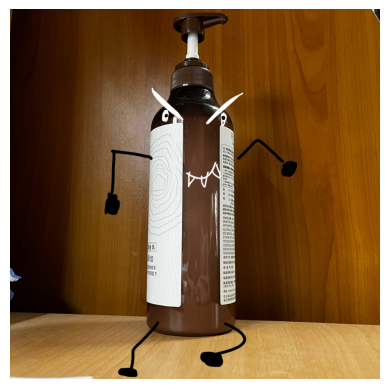

Item Bag: 'Empty'

1. General Trash (一般垃圾)
2. Recyclable Plastic Bottle (寶特瓶禍首)
3. Glass bottles(玻璃瓶)
4. Recyclable Paper Containers (紙容器回收)
5. Kitchen Waste (廚餘垃圾)
2, 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Old Battery Monster!



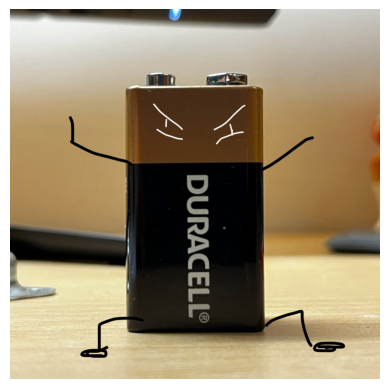

Item Bag: 'Empty'

1. General Trash (一般垃圾)
2. Recyclable Plastic Bottle (寶特瓶禍首)
3. Glass bottles(玻璃瓶)
4. Recyclable Paper Containers (紙容器回收)
5. Kitchen Waste (廚餘垃圾)
1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


You encountered a Expired liquid Medicine Monster!



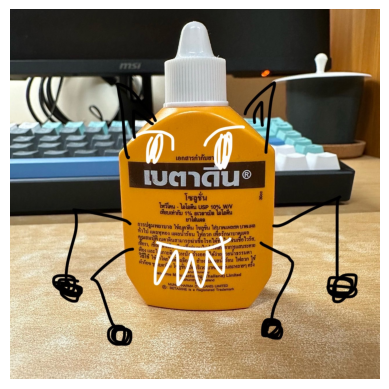

Item Bag: 'Empty'

1. General Trash (一般垃圾)
2. Recyclable Plastic Bottle (寶特瓶禍首)
3. Glass bottles(玻璃瓶)
4. Recyclable Paper Containers (紙容器回收)
5. Kitchen Waste (廚餘垃圾)
2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Round 1 : Shampoo Bottle Monster (Empty, Paper Label)
-------------------------------------------
You have answered : General Trash (一般垃圾) / Recyclable Plastic Bottle (寶特瓶禍首)
Correct answer    : General Trash (一般垃圾) / Recyclable Plastic Bottle (寶特瓶禍首)
+10.0 points


Round 2 : Old Battery Monster
-------------------------------------------
You have answered : General Trash (一般垃圾)
Correct answer    : General Trash (一般垃圾)
+10.0 points


Round 3 : Expired liquid Medicine Monster
-------------------------------------------
You have answered : Recyclable Plastic Bottle (寶特瓶禍首)
Correct answer    : General Trash (一般垃圾)
+0.0 points


Your total score is 20.0
Your accumulated score is 77.5

Tip 1: If your shampoo bottle is not empty, it is recommended to drain the bottle before throwing away the bottle in their designated bins. Don't forget to peel the label off and discard them in their respective bins too!


<IPython.core.display.Javascript object>

In [ ]:
# --- Fight Scene 3 --- #
# --- stage: Dormitory --- #
scene3()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unfortunately your final score is below 80
Ping: HA! I thought so, you're just as weak as I thought! You're too pathetic to save this world!
You slowly succumb to your wounds drifting away slowly. As your eyes close for one last time, all you can hear is the evil laughter of Ping.



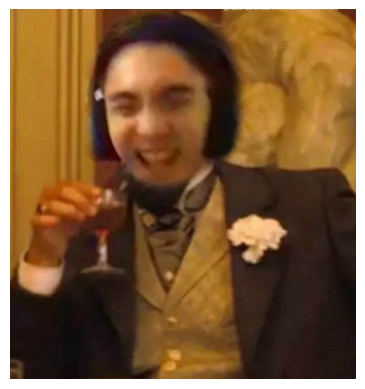

<IPython.core.display.Javascript object>

In [ ]:
# --- End scene --- #
# --- Debugging Zone --- #
# total_scores = 105
# total_scores = 80
# ---------------------- #
if total_scores > 80:
  endscene_tb = wd.TabBar(['Endscene 1.1', 'Endscene 1.2', 'Endscene 1.3', 'Final Scene'])
  for i in range(4):
    with endscene_tb.output_to(i, select = False):
      if i == 0:
        endscene_1()
      elif i == 1:
        endscene_2()
      elif i == 2:
        endscene_3()
      else:
        endscene_4()
else:
  endscene_tb = wd.TabBar(['Final Scene'])
  with endscene_tb.output_to(0, select = False):
    loseScene()